<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/datamining/global-data-on-sustainable-energy (1).csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
print(data.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


# Data Cleaning

In [4]:
# Assuming your DataFrame is named 'data'
unique_countries = data['Entity'].unique()

# Print the list of unique countries without repetitions
for country in unique_countries:
    print(country)


Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
French Guiana
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nauru
Nepal
Netherlands
New 

In [5]:
data.fillna(0, inplace=True)


In [6]:
import pandas as pd
import plotly.express as px


# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Remove the newline character from the column name
filtered_data.rename(columns=lambda x: x.replace('\n', '_'), inplace=True)

# Create a scatter plot using Plotly Express with facetting by 'Entity'
fig = px.scatter(filtered_data, x='Access to electricity (% of population)', y='Value_co2_emissions_kt_by_country',
                 title='Carbon Emission vs Energy Access Classification',
                 labels={'Access to electricity (% of population)': 'Access to Electricity (%)', 'Value_co2_emissions_kt_by_country': 'Carbon Emission (metric tons per capita)'},
                 marginal_y='box',  # This adds a box plot to the y-axis
                 color='Access to electricity (% of population)',  # Color points by energy access
                 facet_col='Entity',  # Create separate plots for each country
                 facet_col_wrap=3,  # Number of columns in the facet grid
                 width=1200,  # Adjust the width of the entire plot
                 height=800,  # Adjust the height of the entire plot
                 )

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=4))  # Adjust marker size

# Update the layout for better visualization
fig.update_layout(
    legend_title='Access to Electricity (%)',  # Set the legend title
    showlegend=True,
    legend=dict(x=0.02, y=1),
    autosize=True,
)

# Show the plot
fig.show()


In [24]:
asia = ['Thailand']

In [26]:
data_asia = data[data['Entity'].isin(asia)]
data_asia

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3250,Thailand,2000,82.100000,56.9,56.77,150000.0,21.82,83.15,0.0,6.38,...,11764.549,4.93,164490.0000,2.574610,4.455247,2007.735271,137,513120.0,15.870032,100.992541
3251,Thailand,2001,90.451380,58.6,56.24,6490000.0,19.89,88.97,0.0,6.76,...,12293.458,4.90,173160.0000,2.571448,3.444249,1893.264239,137,513120.0,15.870032,100.992541
3252,Thailand,2002,91.080220,61.1,55.92,10660000.0,19.91,93.51,0.0,8.07,...,13208.064,5.10,184240.0055,2.818034,6.149036,2096.187802,137,513120.0,15.870032,100.992541
3253,Thailand,2003,91.703830,63.0,55.60,3650000.0,20.21,100.61,0.0,8.36,...,14080.671,5.15,191929.9927,2.722708,7.189243,2359.116831,137,513120.0,15.870032,100.992541
3254,Thailand,2004,92.324550,64.6,57.08,1520000.0,19.89,109.46,0.0,7.63,...,15161.756,5.24,210190.0024,2.313350,6.289342,2660.126835,137,513120.0,15.870032,100.992541
3255,Thailand,2005,92.944730,66.4,57.07,0.0,20.11,115.58,0.0,7.42,...,15521.235,5.18,217770.0043,2.275210,4.187638,2894.062656,137,513120.0,15.870032,100.992541
3256,Thailand,2006,99.146200,68.2,61.55,100000.0,20.53,119.41,0.0,9.82,...,15733.904,5.03,219880.0049,2.977826,4.967811,3369.543198,137,513120.0,15.870032,100.992541
3257,Thailand,2007,94.193370,69.6,66.31,440000.0,21.61,122.12,0.0,10.20,...,16149.867,4.95,224589.9963,2.936369,5.435152,3973.017172,137,513120.0,15.870032,100.992541
3258,Thailand,2008,94.827170,71.1,69.67,4660000.0,22.63,127.43,0.0,8.95,...,16027.417,4.99,227580.0018,2.948281,1.725699,4379.658787,137,513120.0,15.870032,100.992541
3259,Thailand,2009,98.960000,72.6,70.66,1720000.0,22.83,128.09,0.0,9.09,...,16344.104,5.00,220259.9945,3.050123,-0.690618,4213.006654,137,513120.0,15.870032,100.992541


In [27]:

electricity_asia = data_asia[['Entity','Year','Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)','Electricity from renewables (TWh)',]]
electricity_asia.head()

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
3250,Thailand,2000,83.15,0.0,6.38
3251,Thailand,2001,88.97,0.0,6.76
3252,Thailand,2002,93.51,0.0,8.07
3253,Thailand,2003,100.61,0.0,8.36
3254,Thailand,2004,109.46,0.0,7.63


In [28]:
electricity_asia_sum = electricity_asia.groupby('Year').sum()
electricity_asia_sum['Total Electricity'] = electricity_asia_sum.sum(axis=1)
electricity_asia_sum['% Fossil Fuel'] = (electricity_asia_sum['Electricity from fossil fuels (TWh)']/electricity_asia_sum['Total Electricity'])*100
electricity_asia_sum['% Nuclear'] = (electricity_asia_sum['Electricity from nuclear (TWh)']/electricity_asia_sum['Total Electricity'])*100
electricity_asia_sum['% Renewable'] = (electricity_asia_sum['Electricity from renewables (TWh)']/electricity_asia_sum['Total Electricity'])*100
electricity_asia_sum.head()

<ipython-input-28-6410d5c9af77>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Total Electricity,% Fossil Fuel,% Nuclear,% Renewable
Year,,,,,,,
2000,83.15,0.0,6.38,89.53,92.873897,0.0,7.126103
2001,88.97,0.0,6.76,95.73,92.938473,0.0,7.061527
2002,93.51,0.0,8.07,101.58,92.055523,0.0,7.944477
2003,100.61,0.0,8.36,108.97,92.328164,0.0,7.671836
2004,109.46,0.0,7.63,117.09,93.483645,0.0,6.516355


In [29]:
import plotly.graph_objs as go
fig_electricity_asia_volume = go.Figure()
fig_electricity_asia_volume.add_trace(go.Scatter(x = electricity_asia_sum.index, y = electricity_asia_sum['Total Electricity'], name = 'Total Electricity', mode = 'lines+markers'))
fig_electricity_asia_volume.add_trace(go.Scatter(x = electricity_asia_sum.index, y = electricity_asia_sum['Electricity from fossil fuels (TWh)'], name = ' Fossil Fuel', mode = 'lines+markers'))
fig_electricity_asia_volume.add_trace(go.Scatter(x = electricity_asia_sum.index, y = electricity_asia_sum['Electricity from nuclear (TWh)'], name = 'Nuclear', mode = 'lines+markers'))
fig_electricity_asia_volume.add_trace(go.Scatter(x = electricity_asia_sum.index, y = electricity_asia_sum['Electricity from renewables (TWh)'], name = 'Renewable', mode = 'lines+markers'))
fig_electricity_asia_volume.update_layout( title = 'Electricity Production in Thailand', xaxis_tickfont_size = 7, template = 'plotly_dark')
fig_electricity_asia_volume.update_xaxes(rangeslider_visible = True)
fig_electricity_asia_volume.show()

In [32]:
primary_energy_asia = data_asia[['Entity','Year','Primary energy consumption per capita (kWh/person)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Renewables (% equivalent primary energy)','gdp_per_capita']]
primary_energy_asia.fillna(0,inplace=True)
primary_energy_asia.head()

<ipython-input-32-8f20dcb82bdc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entity,Year,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_per_capita
3250,Thailand,2000,11764.549,4.93,2.574610,2007.735271
3251,Thailand,2001,12293.458,4.90,2.571448,1893.264239
3252,Thailand,2002,13208.064,5.10,2.818034,2096.187802
3253,Thailand,2003,14080.671,5.15,2.722708,2359.116831
3254,Thailand,2004,15161.756,5.24,2.313350,2660.126835


In [35]:
from plotly.subplots import make_subplots
def double_y_axes_consumption_gdp(countries,column_1,column_2,dataframe):
    for country in countries:
        country_data = dataframe[dataframe['Entity'] == country]
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        fig.add_trace(go.Scatter(x=country_data['Year'], y=country_data[column_1], name=f'{country} - {column_1}', mode='lines+markers'), secondary_y=False)
        fig.add_trace(go.Scatter(x=country_data['Year'], y=country_data[column_2], name=f'{country} - {column_2}', mode='lines+markers'), secondary_y=True)
        fig.update_layout(title=f'Primary Energy Consumption & GDP - {country}',xaxis_title='Year',yaxis_title=column_1,template='plotly_dark')
        fig.update_yaxes(title_text=column_1, secondary_y=False)
        fig.update_yaxes(title_text=column_2, secondary_y=True)
        fig.update_xaxes(tickfont=dict(size=10), title_font=dict(size=10))
        fig.update_yaxes(tickfont = dict(size=10), title_font = dict(size=10))
        fig.show()

In [36]:

double_y_axes_consumption_gdp(asia,'Primary energy consumption per capita (kWh/person)','gdp_per_capita',primary_energy_asia)

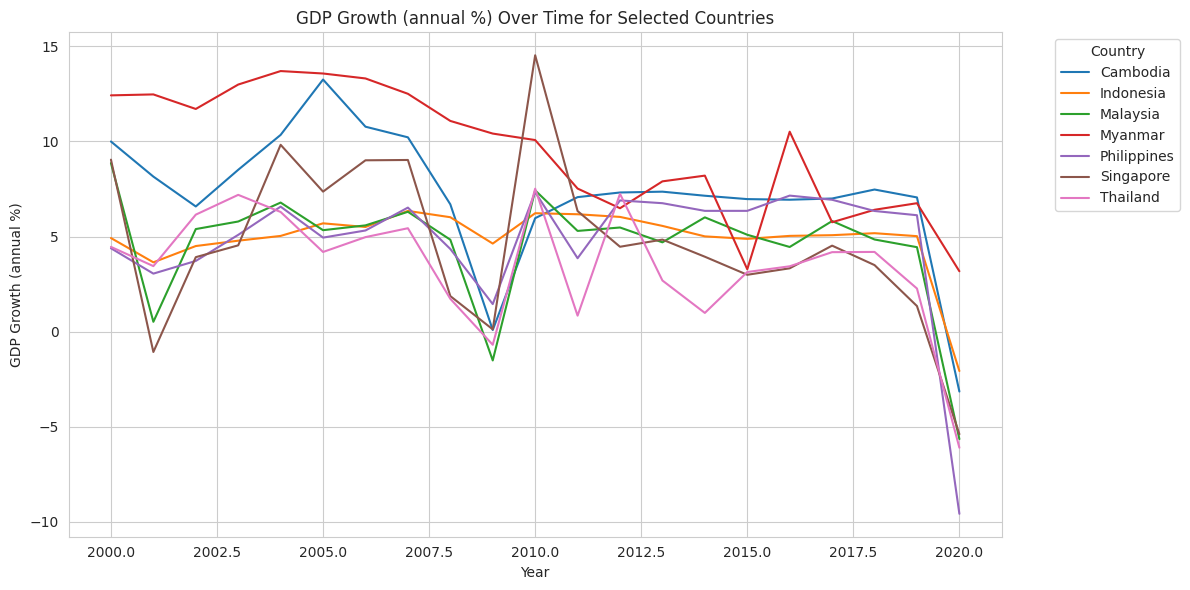

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Set the style for the plot
sns.set_style("whitegrid")

# Create a line plot for each country
plt.figure(figsize=(12, 6))
for country in countries_to_include:
    country_data = filtered_data[filtered_data['Entity'] == country]
    sns.lineplot(data=country_data, x='Year', y='gdp_growth', label=country)

# Customize the plot
plt.title('GDP Growth (annual %) Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


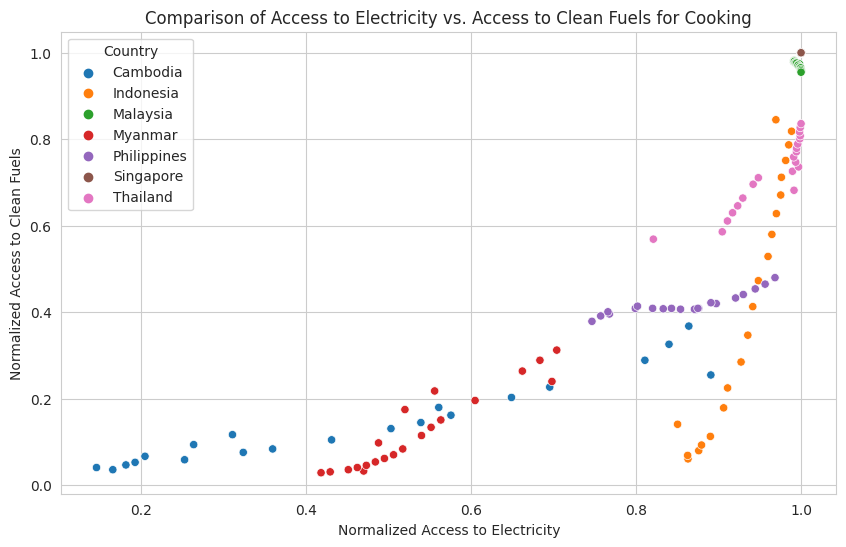

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Select the columns of interest
columns_of_interest = ['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking']

# Normalize the data for both columns
filtered_data['Normalized Access to Electricity'] = filtered_data['Access to electricity (% of population)'] / 100.0  # Normalize to [0, 1]
filtered_data['Normalized Access to Clean Fuels'] = filtered_data['Access to clean fuels for cooking'] / 100.0  # Normalize to [0, 1]

# Create a scatter plot to compare the normalized data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Normalized Access to Electricity', y='Normalized Access to Clean Fuels', hue='Entity')
plt.title('Comparison of Access to Electricity vs. Access to Clean Fuels for Cooking')
plt.xlabel('Normalized Access to Electricity')
plt.ylabel('Normalized Access to Clean Fuels')
plt.grid(True)
plt.legend(title='Country')
plt.show()


<Figure size 1200x600 with 0 Axes>

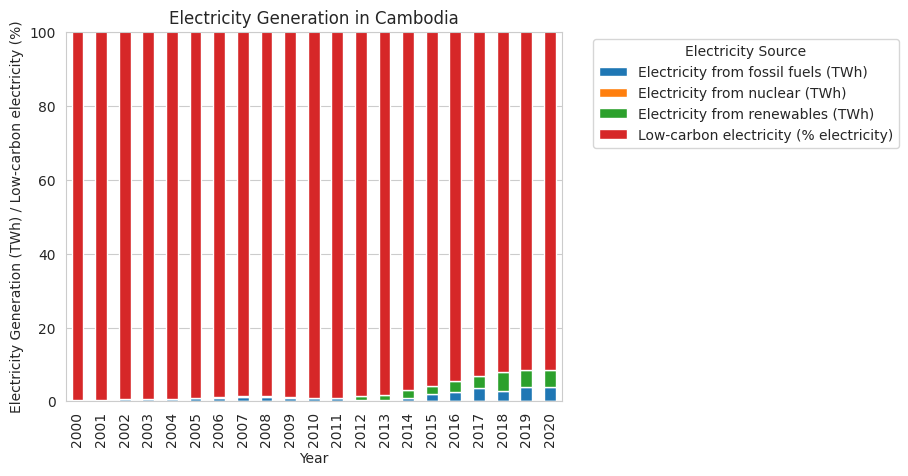

<Figure size 1200x600 with 0 Axes>

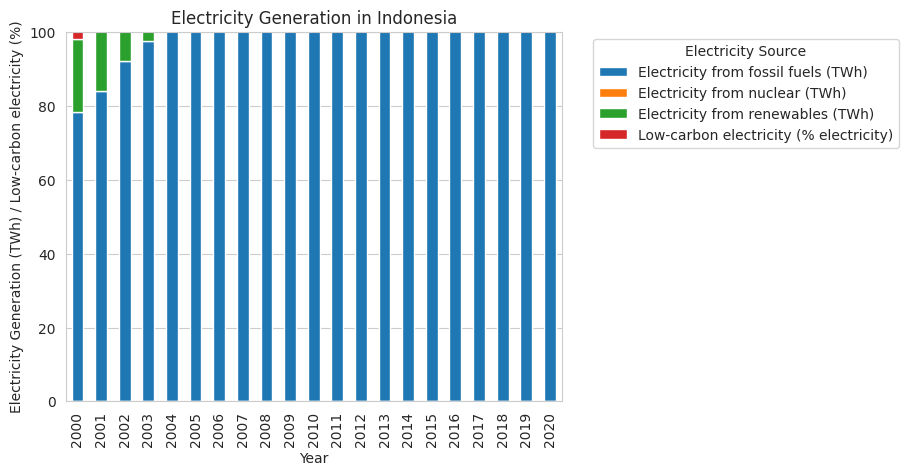

<Figure size 1200x600 with 0 Axes>

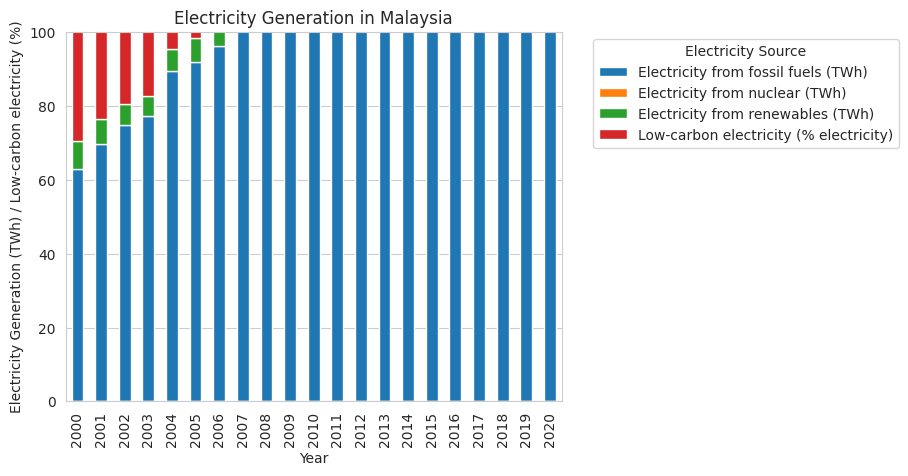

<Figure size 1200x600 with 0 Axes>

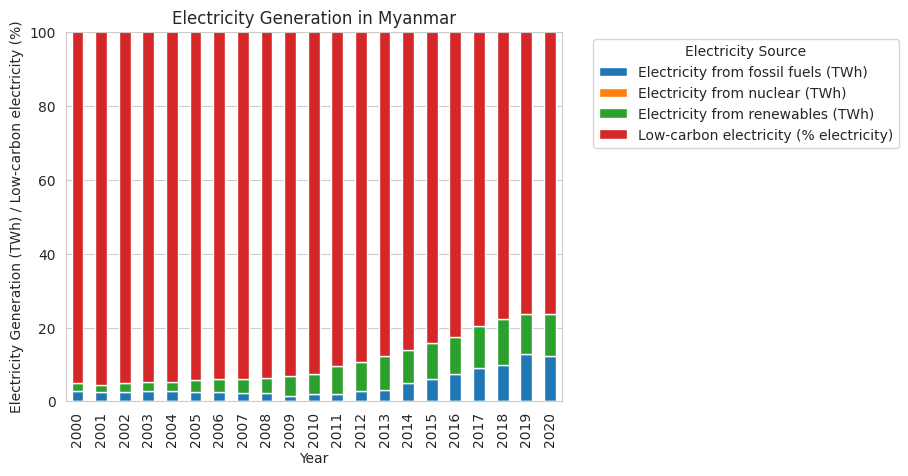

<Figure size 1200x600 with 0 Axes>

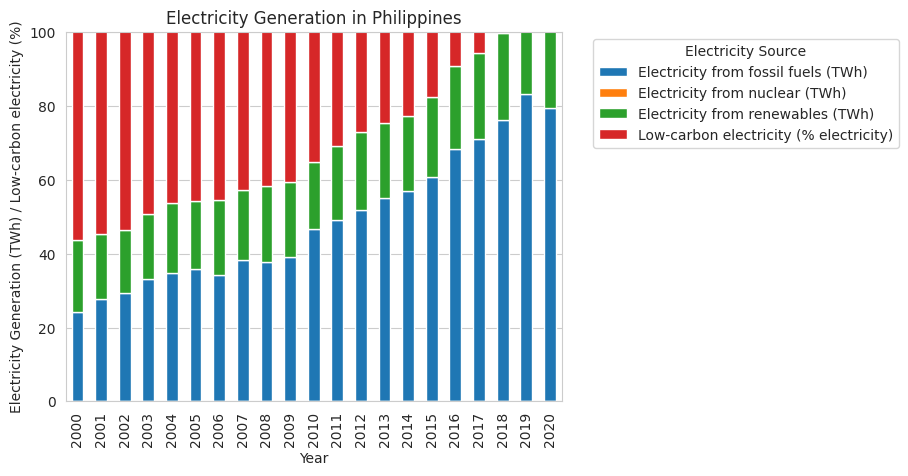

<Figure size 1200x600 with 0 Axes>

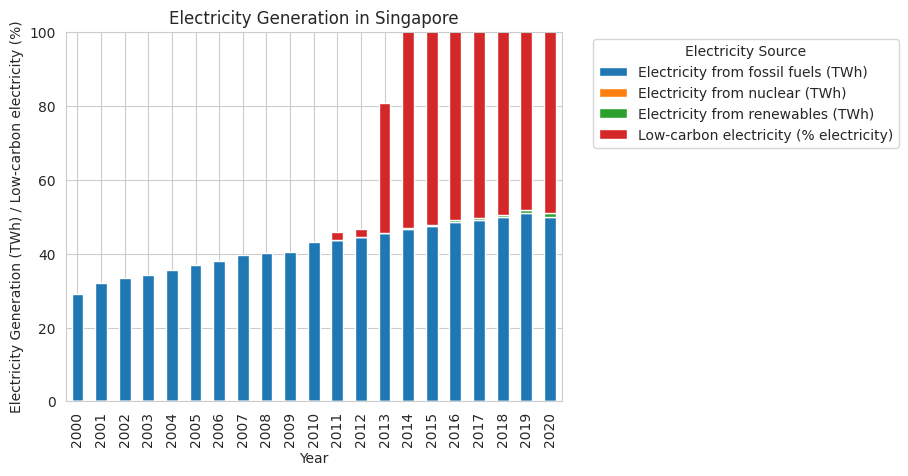

<Figure size 1200x600 with 0 Axes>

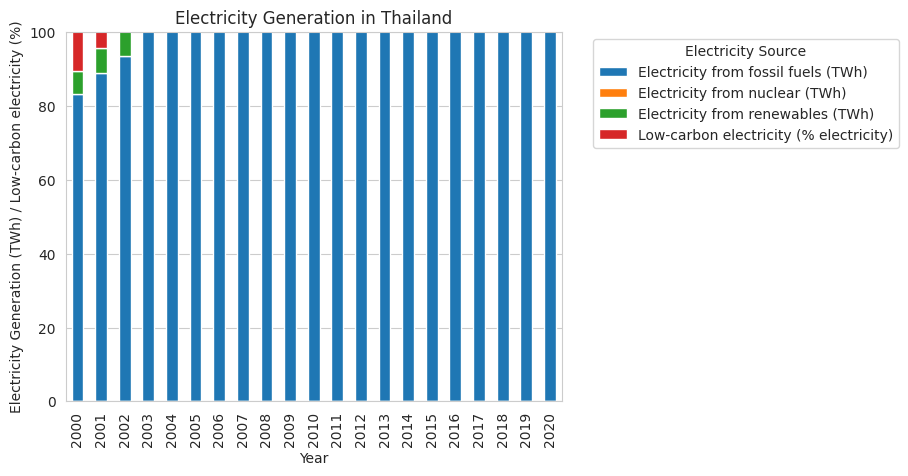

In [10]:
# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Select the columns of interest
columns_of_interest = ['Year', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)']

# Set the range for 'Low-carbon electricity (% electricity)' to be in [0, 100]
filtered_data['Low-carbon electricity (% electricity)'] *= 100.0

# Iterate through the list of countries and create separate bar graphs for each
for country in countries_to_include:
    country_data = filtered_data[filtered_data['Entity'] == country]

    # Check if the country_data DataFrame is not empty
    if not country_data.empty:
        plt.figure(figsize=(12, 6))
        ax = country_data.plot(x='Year', y=columns_of_interest[1:], kind='bar', stacked=True)
        plt.title(f'Electricity Generation in {country}')
        plt.xlabel('Year')
        plt.ylabel('Electricity Generation (TWh) / Low-carbon electricity (%)')
        plt.ylim(0, 100)  # Set the y-axis range to [0, 100]

        # Move the legend outside of the graph
        ax.legend(title='Electricity Source', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.show()


In [11]:
print(data.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [13]:
print(data.columns)


Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


# Data Cleaning

In [14]:
has_nan = data.isna().any().any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")

The dataset contains NaN values.


In [15]:
data.fillna(0, inplace=True)

In [16]:
has_nan = data.isna().any().any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")

The dataset does not contain NaN values.


# Prediction

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-51-ae0cec82e50f>:69: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

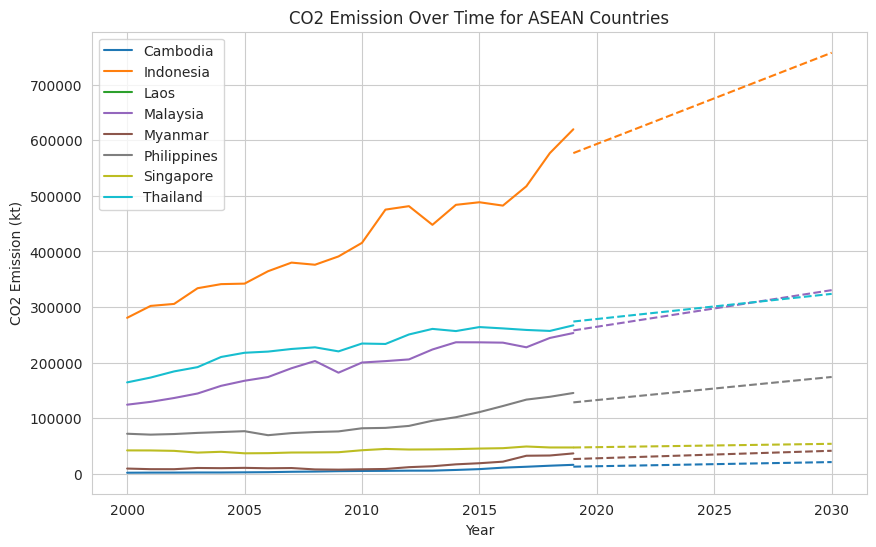

R2 Score is : 0.8804400223924882


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Load your dataset (assuming it has columns like 'Entity', 'Year', and 'gdp_growth')

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand']

# Create an empty DataFrame to store predicted data
predicted_data = pd.DataFrame(columns=['Entity', 'Year', 'Predicted Growth'])

# Create a linear regression model
model = LinearRegression()

r2_scores_dict = {}

# Iterate through the list of countries
for country in countries_to_include:
    # Filter the data for the current country
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]

    if not country_data.empty:

        # Prepare data for training
        X_train = country_data[['Year']]
        y_train = country_data['Value_co2_emissions_kt_by_country']

        # Prepare data for training
        X = country_data[['Year']]
        y = country_data['Value_co2_emissions_kt_by_country']

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the R-squared score for the current country
        r2_score_value = r2_score(y_test, y_pred)

        # Store the R-squared score in the dictionary
        r2_scores_dict[country] = r2_score_value




        # Predict GDP growth for future years (2020+)
        years_to_predict = [2019, 2020, 2021, 2022, 2023, 2024, 2025,2026,2027,2028,2029,2030]  # Add more years as needed
        X_future = pd.DataFrame({'Year': years_to_predict})
        predicted_growth = model.predict(X_future)

        # Create a DataFrame for the current country's predicted data
        predicted_country_data = pd.DataFrame({'Entity': [country] * len(years_to_predict),
                                               'Year': years_to_predict,
                                               'Predicted Growth': predicted_growth})

        # Append the predicted data to the overall DataFrame
        predicted_data = predicted_data.append(predicted_country_data, ignore_index=True)

# Visualize the predicted GDP growth for the selected countries
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(countries_to_include))

for idx, country in enumerate(countries_to_include):
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]
    country_predicted_data = predicted_data[predicted_data['Entity'] == country]

    # Plot both historical and predicted data using the same color
    color = colors(idx)
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=f'{country}', linestyle='-', color=color)
    plt.plot(country_predicted_data['Year'], country_predicted_data['Predicted Growth'], linestyle='--', color=color)

plt.title('CO2 Emission Over Time for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (kt)')
plt.legend()
plt.grid(True)
plt.show()

print('R2 Score is :',r2_score_value)


In [40]:
from sklearn.metrics import mean_squared_error

# Create an empty dictionary to store MSE values for each country
mse_dict = {}

for country in countries_to_include:
    # Filter the data for the current country
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]

    if not country_data.empty:
        # Prepare data for training
        X_train = country_data[['Year']]
        y_train = country_data['Low-carbon electricity (% electricity)']

        # Train the model
        model.fit(X_train, y_train)

        # Predict GDP growth for future years (2020+)
        years_to_predict = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
        X_future = pd.DataFrame({'Year': years_to_predict})
        predicted_growth = model.predict(X_future)

        # Calculate MSE for the current country
        mse = mean_squared_error(y_train, model.predict(X_train))

        # Store MSE value in the dictionary
        mse_dict[country] = mse

# Calculate the average MSE across all countries
average_mse = sum(mse_dict.values()) / len(mse_dict)

print("Mean Squared Error (MSE) for Each Country:")
for country, mse in mse_dict.items():
    print(f"{country}: {mse:.2f}")

print("\nAverage MSE Across All Countries:", average_mse)


Mean Squared Error (MSE) for Each Country:
Cambodia: 183.52
Indonesia: 1.94
Malaysia: 6.42
Myanmar: 109.06
Philippines: 3.16
Singapore: 0.08
Thailand: 2.83

Average MSE Across All Countries: 43.85658322271006
